## Covid-19 현황 분석 (연하늘코드)
copy() 어떻게 이런생각을했찡? 연하늘이~똑똑이>_<

In [77]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime
from tqdm.notebook import tqdm

In [3]:
key_fd = open('gov_data_api_key.txt', mode='r')
govapi_key = key_fd.read(100)
key_fd.close()

In [21]:
start_date = '20201018'
end_date = '20201020'

In [22]:
corona_url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'
url = f'{corona_url}?ServiceKey={govapi_key}&pageNo=1&numOfRows=10&startCreateDt={start_date}&endCreateDt={end_date}'

In [23]:
result = requests.get(url)
soup = BeautifulSoup(result.text, 'xml')

In [8]:
#soup.find_all('item')

In [24]:
# 하루치 
create_date = []; def_list = []; gubun_list = []; incdec_list = []; isolClearCnt_list = []
qurRate_list = []; stdDay_list = []; isolingcnt_list=[]; local_list=[]; overflow_list = []

items = soup.find_all('item')

for i in range(len(items)):
    create_date.append(items[i].find('createDt').get_text()) # 등록시간
    def_list.append(items[i].find('defCnt').get_text()) # 누적확진자수
    gubun_list.append(items[i].find('gubun').get_text()) # 시도, 검역
    incdec_list.append(items[i].find('incDec').get_text()) # 전일대비 증감수
    isolClearCnt_list.append(items[i].find('isolClearCnt').get_text()) # 격리해제
    qurRate_list.append(items[i].find('qurRate').get_text()) #10만명당 발생수
    stdDay_list.append(items[i].find('stdDay').get_text()) # 기준일시
    isolingcnt_list.append(items[i].find('isolIngCnt').get_text()) # 격리중
    local_list.append(items[i].find('localOccCnt').get_text()) # 국내발생
    overflow_list.append(items[i].find('overFlowCnt').get_text()) # 해외발생

In [25]:
df = pd.DataFrame({
    '등록시간' : create_date,
    '지역' : gubun_list,
    '누적확진자' : def_list,
    '전일대비 증감' : incdec_list,
    '격리해제' : isolClearCnt_list,
    '격리중' : isolingcnt_list,
    '10만명당 발생수': qurRate_list,
    '국내발생' : local_list,
    '해외발생' : overflow_list,
    '기준일시': stdDay_list
})
df

,등록시간,지역,누적확진자,전일대비 증감,격리해제,격리중,10만명당 발생수,국내발생,해외발생,기준일시
0,2020-10-20 13:48:10.277,검역,1652,3,1434,218,-,0,3,2020년 10월 20일 00시
1,2020-10-20 13:48:10.277,제주,59,0,59,0,8.80,0,0,2020년 10월 20일 00시
2,2020-10-20 13:48:10.277,경남,301,1,290,11,8.95,0,1,2020년 10월 20일 00시
3,2020-10-20 13:48:10.277,경북,1575,2,1507,12,59.15,0,2,2020년 10월 20일 00시
4,2020-10-20 13:48:10.277,전남,177,0,167,8,9.49,0,0,2020년 10월 20일 00시
...,...,...,...,...,...,...,...,...,...,...
71,2020-10-18 09:41:19.678,인천,994,1,916,70,33.63,1,0,2020년 10월 18일 00시
72,2020-10-18 09:41:19.678,대구,7142,0,6937,9,293.13,0,0,2020년 10월 18일 00시
73,2020-10-18 09:41:19.677,부산,556,4,449,101,16.30,2,2,2020년 10월 18일 00시
74,2020-10-18 09:41:19.677,서울,5688,20,5132,487,58.44,18,2,2020년 10월 18일 00시


In [27]:
df[df['지역'] == '검역']  
# 10/18~20 조회했는데 왜 19일이 두번나오는거지???
#10/18누적확진자1637 + 10/19누적확진자1649 + 10/20누적확진자1652

,등록시간,지역,누적확진자,전일대비 증감,격리해제,격리중,10만명당 발생수,국내발생,해외발생,기준일시
0,2020-10-20 13:48:10.277,검역,1652,3,1434,218,-,0,3,2020년 10월 20일 00시
19,2020-10-19 10:26:37.274,검역,1649,12,1434,215,-,0,12,2020년 10월 19일 00시
38,2020-10-19 09:40:14.447,검역,1649,12,1434,215,-,0,12,2020년 10월 19일 00시
57,2020-10-18 09:41:19.679,검역,1637,13,1434,203,-,0,13,2020년 10월 18일 00시


In [44]:
#3일치
import datetime

In [28]:
start_date = '20201018'
end_date = '20201020'

In [42]:
#위에서 입력한 문자를 datetime으로 바꿔줌
start_date = pd.to_datetime(start_date)  
end_date = pd.to_datetime(end_date)

print((end_date-start_date).days)  # 차이 2일

2


In [45]:
a = (end_date - datetime.timedelta(days=1)).strftime("%Y-%m-%d")  
#end_date 20일에서 하루빼서 19일
#datetime>날짜,시간 문자열로 만드는 메소드strftime() 연-월-일
a

'2020-10-19'

In [46]:
range((end_date-start_date).days+1)
#end_date까지 포함해야하니까 days+1

range(0, 3)

In [49]:
date = (end_date - datetime.timedelta(days=i)).strftime("%Y%m%d")
date  #어째서 days=n은 안되고 days=i는 되는거지???

'20201020'

In [50]:
dict_list = []

corona_url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'
url = f'{corona_url}?ServiceKey={govapi_key}&pageNo=1&numOfRows=10&startCreateDt={start_date}&endCreateDt={end_date}'
result = requests.get(url)
soup = BeautifulSoup(result.text, 'xml')
for i in range((end_date-start_date).days+1):
    date = (end_date - datetime.timedelta(days=i)).strftime("%Y-%m-%d") 
    #datetime>날짜,시간 문자열로 만드는 메소드strftime()
    a_dict = {'일자':date, '서울':0, '부산':0, '대구':0, '인천': 0, '광주':0, '대전':0, '울산':0, '세종': 0, '강원':0, '충북':0, '충남':0, '전북': 0, '전남':0, '경북':0, '경남':0, '제주': 0, '검역': 0}
    new_date = (end_date - datetime.timedelta(days=i)).strftime("%Y%m%d")
    corona_url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'
    url = f'{corona_url}?ServiceKey={govapi_key}&pageNo=1&numOfRows=10&startCreateDt={new_date}&endCreateDt={new_date}'
    result = requests.get(url)
    soup = BeautifulSoup(result.text, 'xml')
    items = soup.find_all('item')
    for k in range(len(items)):
        area = items[k].find('gubun').get_text()
        num = items[k].find('incDec').get_text()
        a_dict[area] = num
    dict_list.append(a_dict)
    print(a_dict)

{'일자': '2020-10-20', '서울': '11', '부산': '2', '대구': '0', '인천': '3', '광주': '0', '대전': '1', '울산': '0', '세종': '0', '강원': '3', '충북': '2', '충남': '2', '전북': '0', '전남': '0', '경북': '2', '경남': '1', '제주': '0', '검역': '3', '경기': '28', '합계': '58'}
{'일자': '2020-10-19', '서울': '14', '부산': '15', '대구': '0', '인천': '5', '광주': '2', '대전': '2', '울산': '0', '세종': '0', '강원': '1', '충북': '1', '충남': '2', '전북': '1', '전남': '0', '경북': '2', '경남': '1', '제주': '0', '검역': '12', '경기': '18', '합계': '76'}
{'일자': '2020-10-18', '서울': '20', '부산': '4', '대구': '0', '인천': '1', '광주': '0', '대전': '1', '울산': '0', '세종': '0', '강원': '2', '충북': '0', '충남': '0', '전북': '0', '전남': '0', '경북': '0', '경남': '0', '제주': '0', '검역': '13', '경기': '50', '합계': '91'}


In [51]:
ex=pd.DataFrame(dict_list)
ex  #오3일치 나왔다

,일자,서울,부산,대구,인천,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주,검역,경기,합계
0,2020-10-20,11,2,0,3,0,1,0,0,3,2,2,0,0,2,1,0,3,28,58
1,2020-10-19,14,15,0,5,2,2,0,0,1,1,2,1,0,2,1,0,12,18,76
2,2020-10-18,20,4,0,1,0,1,0,0,2,0,0,0,0,0,0,0,13,50,91


In [52]:
#전체 반복문
from tqdm.notebook import tqdm

In [53]:
start_date = '20200301'
end_date = '20201130'

In [54]:
start_date = pd.to_datetime(start_date) #datetime으로 변환
end_date = pd.to_datetime(end_date)

print((end_date-start_date).days)  #274일치(2020.03.01~2020.11.30)

274


In [55]:
start_date  #datetime으로 잘 변환되었다

Timestamp('2020-03-01 00:00:00')

In [56]:
dict_list = []

corona_url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'
url = f'{corona_url}?ServiceKey={govapi_key}&pageNo=1&numOfRows=10&startCreateDt={start_date}&endCreateDt={end_date}'
result = requests.get(url)
soup = BeautifulSoup(result.text, 'xml')
for i in tqdm(range((end_date-start_date).days+1)): #tqdm추가
    date = (end_date - datetime.timedelta(days=i)).strftime("%Y-%m-%d") 
    #datetime>날짜,시간 문자열로 만드는 메소드strftime()
    a_dict = {'일자':date, '서울':0, '부산':0, '대구':0, '인천': 0, '광주':0, '대전':0, '울산':0, '세종': 0, '강원':0, '충북':0, '충남':0, '전북': 0, '전남':0, '경북':0, '경남':0, '제주': 0, '검역': 0}
    new_date = (end_date - datetime.timedelta(days=i)).strftime("%Y%m%d")
    corona_url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'
    url = f'{corona_url}?ServiceKey={govapi_key}&pageNo=1&numOfRows=10&startCreateDt={new_date}&endCreateDt={new_date}'
    result = requests.get(url)
    soup = BeautifulSoup(result.text, 'xml')
    items = soup.find_all('item')
    for k in range(len(items)):
        area = items[k].find('gubun').get_text()
        num = items[k].find('incDec').get_text()
        a_dict[area] = num
    dict_list.append(a_dict)
    print(a_dict)

북': '1', '충남': '0', '전북': '0', '전남': '0', '경북': '1', '경남': '0', '제주': '0', '검역': '2', '경기': '2', '합계': '19'}
{'일자': '2020-05-25', '서울': '6', '부산': '0', '대구': '1', '인천': '1', '광주': '0', '대전': '0', '울산': '0', '세종': '0', '강원': '0', '충북': '0', '충남': '0', '전북': '0', '전남': '0', '경북': '1', '경남': '0', '제주': '0', '검역': '1', '경기': '6', '합계': '16'}
{'일자': '2020-05-24', '서울': '6', '부산': '0', '대구': '0', '인천': '2', '광주': '0', '대전': '0', '울산': '0', '세종': '0', '강원': '1', '충북': '0', '충남': '0', '전북': '0', '전남': '0', '경북': '6', '경남': '0', '제주': '0', '검역': '4', '경기': '6', '합계': '25'}
{'일자': '2020-05-23', '서울': '4', '부산': '0', '대구': '1', '인천': '0', '광주': '0', '대전': '1', '울산': '0', '세종': '0', '강원': '0', '충북': '0', '충남': '0', '전북': '0', '전남': '0', '경북': '0', '경남': '1', '제주': '0', '검역': '3', '경기': '13', '합계': '23'}
{'일자': '2020-05-22', '서울': '2', '부산': '0', '대구': '0', '인천': '1', '광주': '0', '대전': '0', '울산': '1', '세종': '0', '강원': '0', '충북': '0', '충남': '0', '전북': '0', '전남': '0', '경북': '2', '경남': '1', '제주': '0', 

In [59]:
corona = pd.DataFrame(dict_list)
corona.tail()

,일자,서울,부산,대구,인천,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주,검역,경기,합계
270,2020-03-05,4,-1,321,0,1,1,0,0,2,1,4,0,-1,87,9,1,0,9,438
271,2020-03-04,1,3,405,2,2,1,3,0,1,0,1,0,0,89,1,0,0,7,516
272,2020-03-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
273,2020-03-02,10,3,469,0,0,0,3,0,8,1,13,1,0,67,4,0,0,7,586
274,2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [60]:
#파일저장
corona.to_csv('./data/전국 시도별 코로나 현황.csv', sep=',', encoding='utf8')

In [21]:
corona_raw = pd.read_csv('./data/전국 시도별 코로나 현황.csv', sep=',', encoding='utf8')

corona_raw.tail()

,Unnamed: 0,Unnamed: 0.1,일자,서울,부산,대구,인천,광주,대전,울산,...,충북,충남,전북,전남,경북,경남,제주,검역,경기,합계
270,270,270,2020-03-05,4,-1,321,0,1,1,0,...,1,4,0,-1,87,9,1,0,9.0,438.0
271,271,271,2020-03-04,1,3,405,2,2,1,3,...,0,1,0,0,89,1,0,0,7.0,516.0
272,272,272,2020-03-03,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
273,273,273,2020-03-02,10,3,469,0,0,0,3,...,1,13,1,0,67,4,0,0,7.0,586.0
274,274,274,2020-03-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0


In [22]:
corona_raw.info()  #'일자'의 컬럼타입변경(Dtype을 object에서 datetime으로 바꾸기)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    275 non-null    int64  
 1   Unnamed: 0.1  275 non-null    int64  
 2   일자            275 non-null    object 
 3   서울            275 non-null    int64  
 4   부산            275 non-null    int64  
 5   대구            275 non-null    int64  
 6   인천            275 non-null    int64  
 7   광주            275 non-null    int64  
 8   대전            275 non-null    int64  
 9   울산            275 non-null    int64  
 10  세종            275 non-null    int64  
 11  강원            275 non-null    int64  
 12  충북            275 non-null    int64  
 13  충남            275 non-null    int64  
 14  전북            275 non-null    int64  
 15  전남            275 non-null    int64  
 16  경북            275 non-null    int64  
 17  경남            275 non-null    int64  
 18  제주            275 non-null    

In [23]:
corona_raw['일자'] = pd.to_datetime(corona_raw['일자']) #'일자'의 컬럼타입변경(Dtype을 object에서 datetime으로 바꾸기)
corona_raw.info()  #'일자'의 컬럼타입이 datetime64 으로 바뀌었다ok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    275 non-null    int64         
 1   Unnamed: 0.1  275 non-null    int64         
 2   일자            275 non-null    datetime64[ns]
 3   서울            275 non-null    int64         
 4   부산            275 non-null    int64         
 5   대구            275 non-null    int64         
 6   인천            275 non-null    int64         
 7   광주            275 non-null    int64         
 8   대전            275 non-null    int64         
 9   울산            275 non-null    int64         
 10  세종            275 non-null    int64         
 11  강원            275 non-null    int64         
 12  충북            275 non-null    int64         
 13  충남            275 non-null    int64         
 14  전북            275 non-null    int64         
 15  전남            275 non-null    int64     

In [24]:
#불필요한컬럼삭제
del corona_raw['Unnamed: 0']
del corona_raw['Unnamed: 0.1']
corona_raw = corona_raw.set_index(corona_raw['일자'])
del corona_raw['일자']
del corona_raw['검역']
del corona_raw['합계'] #증감율 마이너스값이 반영된 부정확한 합계라 삭제
corona_raw = corona_raw.astype(int) #경기와 합계부분 dtype이 float64라서 int로 변경
corona_raw.tail()  #마이너스를... 우짤꼬... 0으로 변환해야겠지?

,서울,부산,대구,인천,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주,경기
일자,,,,,,,,,,,,,,,,,
2020-03-05,4,-1,321,0,1,1,0,0,2,1,4,0,-1,87,9,1,9
2020-03-04,1,3,405,2,2,1,3,0,1,0,1,0,0,89,1,0,7
2020-03-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-02,10,3,469,0,0,0,3,0,8,1,13,1,0,67,4,0,7
2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
corona_raw[corona_raw < 0] = 0  # 0미만의 값을 0으로 변환
corona_raw.tail()

,서울,부산,대구,인천,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주,경기
일자,,,,,,,,,,,,,,,,,
2020-03-05,4,0,321,0,1,1,0,0,2,1,4,0,0,87,9,1,9
2020-03-04,1,3,405,2,2,1,3,0,1,0,1,0,0,89,1,0,7
2020-03-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-02,10,3,469,0,0,0,3,0,8,1,13,1,0,67,4,0,7
2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
corona_raw['합계'] = corona_raw.sum(axis=1)  #이것이 진짜 합계다!!
corona_raw.tail() # corona_raw는 행확진일, 열지역, 일별합계로 구성된 dataframe이다.

,서울,부산,대구,인천,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주,경기,합계
일자,,,,,,,,,,,,,,,,,,
2020-03-05,4,0,321,0,1,1,0,0,2,1,4,0,0,87,9,1,9,440
2020-03-04,1,3,405,2,2,1,3,0,1,0,1,0,0,89,1,0,7,516
2020-03-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-02,10,3,469,0,0,0,3,0,8,1,13,1,0,67,4,0,7,586
2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
#코로나월별데이터만들기 reample
corona_month = corona_raw.resample('M').sum()
corona_month

,서울,부산,대구,인천,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주,경기,합계
일자,,,,,,,,,,,,,,,,,,
2020-03-31,362,34,3552,57,10,23,22,45,24,34,60,7,5,682,36,6,389,5348
2020-04-30,183,18,168,29,10,5,4,0,17,1,15,5,6,65,21,4,200,751
2020-05-31,228,10,31,113,2,6,9,1,4,15,3,3,4,14,6,2,164,615
2020-06-30,452,7,23,135,12,71,3,3,8,5,22,6,5,10,11,4,367,1144
2020-07-31,288,17,34,42,160,49,4,0,9,9,23,12,14,12,25,7,339,1044
2020-08-31,2267,130,107,335,170,90,30,17,115,55,142,48,104,54,77,19,1714,5474
2020-09-30,1424,120,85,200,121,105,58,9,35,43,152,41,27,96,55,14,1123,3708
2020-10-31,719,171,42,129,16,82,16,6,55,18,57,38,16,36,25,0,1019,2445
2020-11-30,2794,217,58,366,185,52,35,18,373,139,358,168,238,117,309,21,1882,7330


In [29]:
corona_month.index = ['3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월']
corona_month # corona_month는 행월별, 열지역, 월별합계로 구성된 dataframe이다.

,서울,부산,대구,인천,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주,경기,합계
3월,362,34,3552,57,10,23,22,45,24,34,60,7,5,682,36,6,389,5348
4월,183,18,168,29,10,5,4,0,17,1,15,5,6,65,21,4,200,751
5월,228,10,31,113,2,6,9,1,4,15,3,3,4,14,6,2,164,615
6월,452,7,23,135,12,71,3,3,8,5,22,6,5,10,11,4,367,1144
7월,288,17,34,42,160,49,4,0,9,9,23,12,14,12,25,7,339,1044
8월,2267,130,107,335,170,90,30,17,115,55,142,48,104,54,77,19,1714,5474
9월,1424,120,85,200,121,105,58,9,35,43,152,41,27,96,55,14,1123,3708
10월,719,171,42,129,16,82,16,6,55,18,57,38,16,36,25,0,1019,2445
11월,2794,217,58,366,185,52,35,18,373,139,358,168,238,117,309,21,1882,7330


In [30]:
coronaT = corona_month.T
coronaT

,3월,4월,5월,6월,7월,8월,9월,10월,11월
서울,362,183,228,452,288,2267,1424,719,2794
부산,34,18,10,7,17,130,120,171,217
대구,3552,168,31,23,34,107,85,42,58
인천,57,29,113,135,42,335,200,129,366
광주,10,10,2,12,160,170,121,16,185
대전,23,5,6,71,49,90,105,82,52
울산,22,4,9,3,4,30,58,16,35
세종,45,0,1,3,0,17,9,6,18
강원,24,17,4,8,9,115,35,55,373
충북,34,1,15,5,9,55,43,18,139


In [31]:
#coronaT의 지역별'합계' 컬럼추가
coronaT['합계'] = coronaT.sum(axis=1)
coronaT = coronaT.iloc[:-1,:] #하단의 월별'합계'빼고 가져와서 
coronaT  # coronaT는 행지역, 열월별, 지역합계로 이루어진 dataframe이다.​

,3월,4월,5월,6월,7월,8월,9월,10월,11월,합계
서울,362,183,228,452,288,2267,1424,719,2794,8717
부산,34,18,10,7,17,130,120,171,217,724
대구,3552,168,31,23,34,107,85,42,58,4100
인천,57,29,113,135,42,335,200,129,366,1406
광주,10,10,2,12,160,170,121,16,185,686
대전,23,5,6,71,49,90,105,82,52,483
울산,22,4,9,3,4,30,58,16,35,181
세종,45,0,1,3,0,17,9,6,18,99
강원,24,17,4,8,9,115,35,55,373,640
충북,34,1,15,5,9,55,43,18,139,319


In [32]:
import platform
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

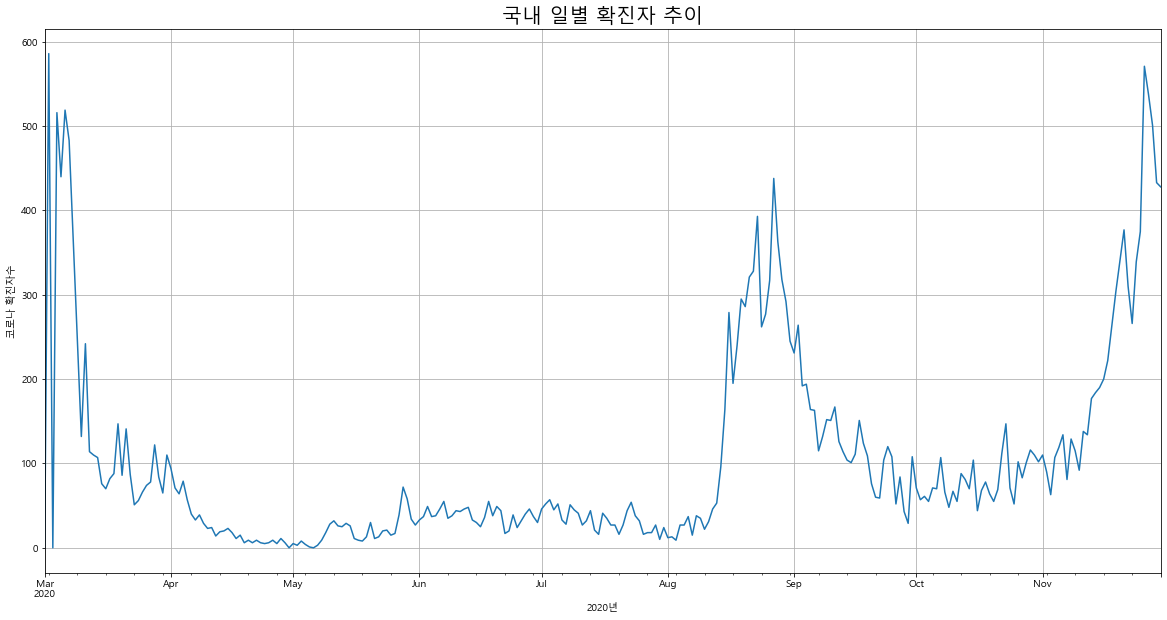

In [38]:
## 일자별 확진자 추이
corona_raw['합계'].plot(grid=True, figsize=(20,10))
plt.title('국내 일별 확진자 추이', fontsize=20)
plt.xlabel('2020년')
plt.ylabel('코로나 확진자수')
plt.show()

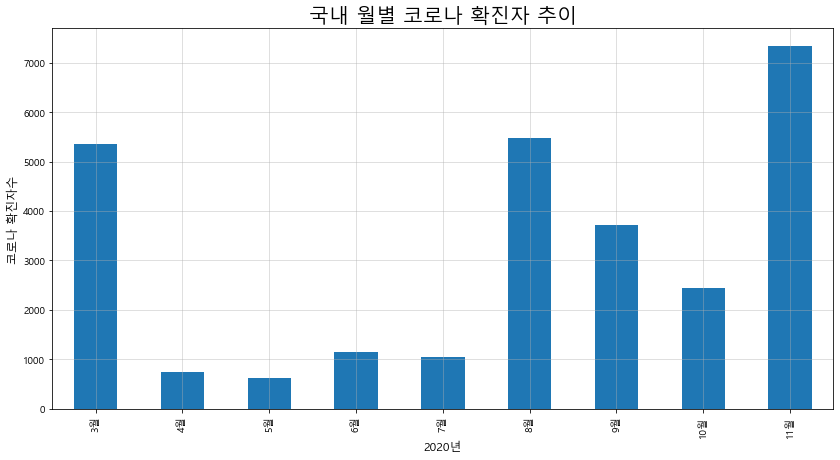

In [39]:
# 월별 확진자 추이
corona_month['합계'].plot(kind='bar', figsize=(14,7))
plt.xlabel('2020년', fontsize=12)
plt.ylabel('코로나 확진자수', fontsize=12)
plt.title('국내 월별 코로나 확진자 추이', fontsize=20)
plt.grid(True, alpha=0.5)
plt.show()

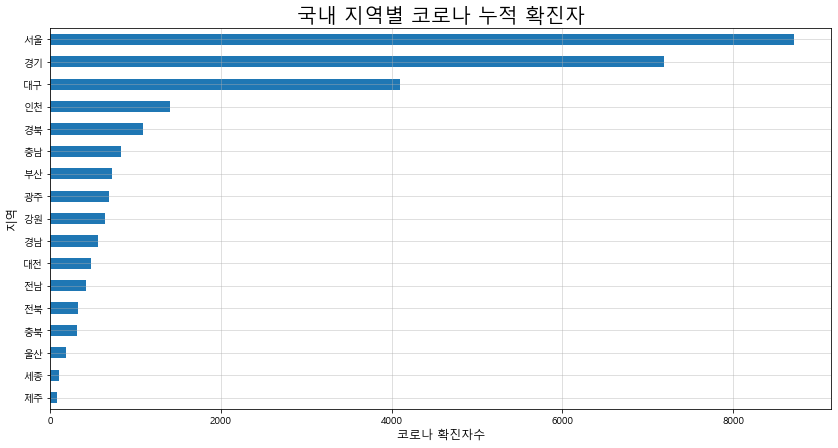

In [40]:
# 지역별 누적 확진자수
coronaT['합계'].sort_values().plot(kind='barh', figsize=(14,7))
plt.ylabel('지역', fontsize=12)
plt.xlabel('코로나 확진자수', fontsize=12)
plt.title('국내 지역별 코로나 누적 확진자', fontsize=20)
plt.grid(True, alpha=0.5)
plt.show()

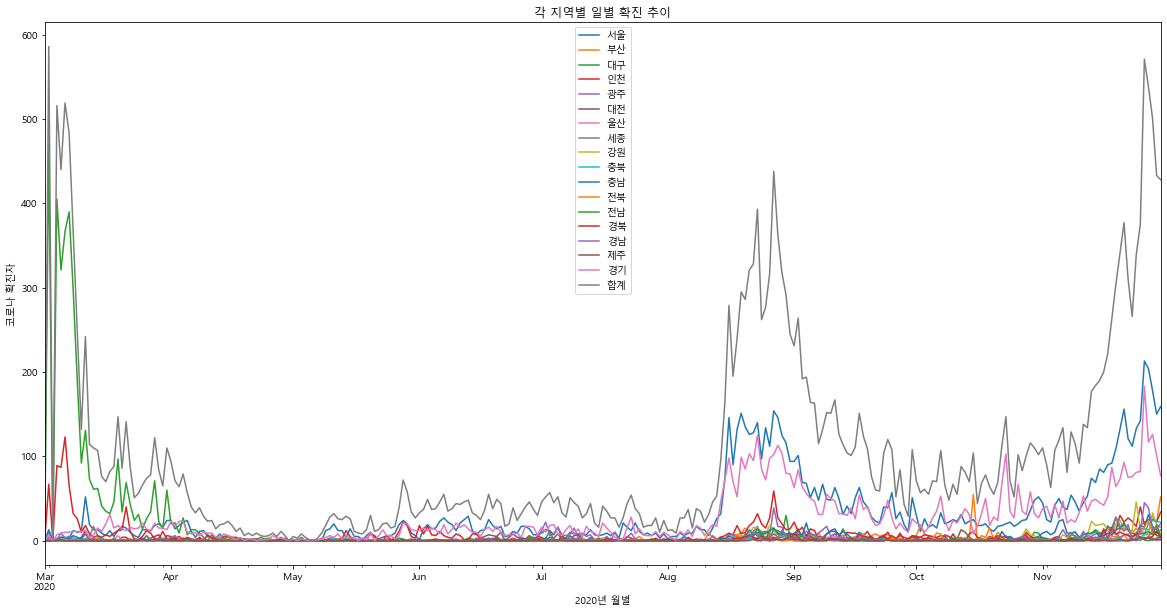

In [41]:
# 나도 보고싶어 만든 각 지역별 일별 확진 추이
corona_raw.plot(figsize=(20,10))
plt.title("각 지역별 일별 확진 추이")
plt.xlabel("2020년 월별")
plt.ylabel("코로나 확진자")
plt.show()

## 지역 인구 데이터와 결합하기

In [50]:
pop = pd.read_csv('../08.Cartogram/results/02.pop.csv')
pop.head()

,Unnamed: 0,광역시도,시군구,20~39세계,20~39세여자,65세이상계,인구수계,인구수남자,인구수여자,소멸비율,소멸위기지역,ID,y,x
0,0,강원,강릉시,46008,20993,40497,203057,101154,101903,1.036768,False,강릉,3,11
1,1,강원,고성군,4006,1699,7005,23621,11933,11688,0.485082,True,고성(강원),0,10
2,2,강원,동해시,16311,7510,16152,83888,42093,41795,0.929916,True,동해,4,11
3,3,강원,삼척시,12428,5280,14953,61833,31630,30203,0.706213,True,삼척,5,11
4,4,강원,속초시,15928,7411,14010,76302,37488,38814,1.057959,False,속초,1,10


In [56]:
pop = pop[['광역시도', '시군구', '인구수계']]
pop.head()

,광역시도,시군구,인구수계
0,강원,강릉시,203057
1,강원,고성군,23621
2,강원,동해시,83888
3,강원,삼척시,61833
4,강원,속초시,76302


In [57]:
#광역시도로 pivot_table (시별 인구합계)
pop_pt = pd.pivot_table(pop, index='광역시도', values='인구수계', aggfunc='sum')
pop_pt

,인구수계
광역시도,
강원,1428480
경기,12437493
경남,3141767
경북,2477500
광주,1409750
대구,2332499
대전,1420059
부산,3222121
서울,9096901


In [59]:
corona_pop = pd.concat([coronaT, pop_pt], axis=1)
corona_pop

,3월,4월,5월,6월,7월,8월,9월,10월,11월,합계,인구수계
서울,362,183,228,452,288,2267,1424,719,2794,8717,9096901
부산,34,18,10,7,17,130,120,171,217,724,3222121
대구,3552,168,31,23,34,107,85,42,58,4100,2332499
인천,57,29,113,135,42,335,200,129,366,1406,2799553
광주,10,10,2,12,160,170,121,16,185,686,1409750
대전,23,5,6,71,49,90,105,82,52,483,1420059
울산,22,4,9,3,4,30,58,16,35,181,1083587
세종,45,0,1,3,0,17,9,6,18,99,321495
강원,24,17,4,8,9,115,35,55,373,640,1428480
충북,34,1,15,5,9,55,43,18,139,319,1508987


In [61]:
# corona_pop = corona_pop.drop(index='합계', axis=1)  #응? 뭘 드랍??
corona_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 서울 to 경기
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   3월      17 non-null     int64
 1   4월      17 non-null     int64
 2   5월      17 non-null     int64
 3   6월      17 non-null     int64
 4   7월      17 non-null     int64
 5   8월      17 non-null     int64
 6   9월      17 non-null     int64
 7   10월     17 non-null     int64
 8   11월     17 non-null     int64
 9   합계      17 non-null     int64
 10  인구수계    17 non-null     int64
dtypes: int64(11)
memory usage: 2.2+ KB


In [63]:
corona_pop['십만명당 확진자 수'] = corona_pop['합계'] / corona_pop['인구수계'] * 100000
corona_pop.head()

,3월,4월,5월,6월,7월,8월,9월,10월,11월,합계,인구수계,십만명당 확진자 수
서울,362,183,228,452,288,2267,1424,719,2794,8717,9096901,95.823842
부산,34,18,10,7,17,130,120,171,217,724,3222121,22.469671
대구,3552,168,31,23,34,107,85,42,58,4100,2332499,175.777139
인천,57,29,113,135,42,335,200,129,366,1406,2799553,50.222303
광주,10,10,2,12,160,170,121,16,185,686,1409750,48.661110


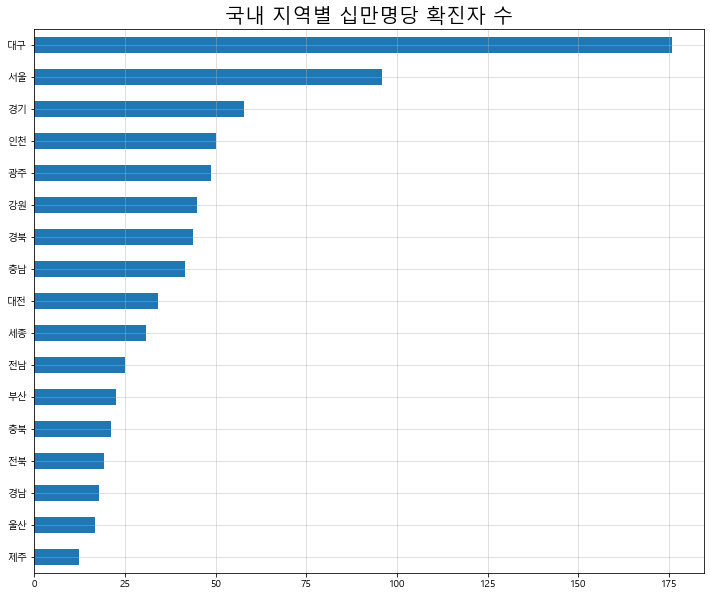

In [64]:
# 십만명당 확진자 수 그래프
corona_pop['십만명당 확진자 수'].sort_values().plot(kind='barh', rot=0, figsize=(12,10), legend=False)
plt.title("국내 지역별 십만명당 확진자 수", fontsize=20)
plt.grid(True, alpha=0.5)
plt.show()

## 지도시각화

In [71]:
import folium
from urllib.parse import quote, urlencode, quote_plus

In [66]:
folium_corona = corona_pop.copy()
folium_corona.head()

,3월,4월,5월,6월,7월,8월,9월,10월,11월,합계,인구수계,십만명당 확진자 수
서울,362,183,228,452,288,2267,1424,719,2794,8717,9096901,95.823842
부산,34,18,10,7,17,130,120,171,217,724,3222121,22.469671
대구,3552,168,31,23,34,107,85,42,58,4100,2332499,175.777139
인천,57,29,113,135,42,335,200,129,366,1406,2799553,50.222303
광주,10,10,2,12,160,170,121,16,185,686,1409750,48.661110


In [67]:
# 시청/도청을 통하여 위도와 경도 받아오기

addr = []
for i in folium_corona.index:
    if i in ['서울','부산','대구','인천','대전','울산','세종','제주']:
        addr.append(f"{i}시청")
    elif i in ['광주']:
        addr.append(f"{i}광역시청")
    elif i in [ '강원', '충북', '충남', '전북', '전남', '경북', '경남', '경기']:
        addr.append(f"{i}도청")
folium_corona['시청'] = addr
folium_corona.head()

,3월,4월,5월,6월,7월,8월,9월,10월,11월,합계,인구수계,십만명당 확진자 수,시청
서울,362,183,228,452,288,2267,1424,719,2794,8717,9096901,95.823842,서울시청
부산,34,18,10,7,17,130,120,171,217,724,3222121,22.469671,부산시청
대구,3552,168,31,23,34,107,85,42,58,4100,2332499,175.777139,대구시청
인천,57,29,113,135,42,335,200,129,366,1406,2799553,50.222303,인천시청
광주,10,10,2,12,160,170,121,16,185,686,1409750,48.661110,광주광역시청


In [69]:
key_fd = open('./data/kakaomapkey.txt', mode='r')
kmap_key = key_fd.read(100)
key_fd.close()

In [72]:
addr = '제주시청'
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query=' + quote(addr)
result = requests.get(url,headers={'Authorization': "KakaoAK "+kmap_key}).json()
result['documents'][0]

{'address_name': '제주특별자치도 제주시 이도2동 1176-1',
 'category_group_code': 'PO3',
 'category_group_name': '공공기관',
 'category_name': '사회,공공기관 > 지방행정기관 > 시청',
 'distance': '',
 'id': '8064058',
 'phone': '064-120',
 'place_name': '제주시청',
 'place_url': 'http://place.map.kakao.com/8064058',
 'road_address_name': '제주특별자치도 제주시 광양9길 10',
 'x': '126.531171087129',
 'y': '33.4995342412698'}

In [73]:
lat_list = []; lng_list = []
for i in folium_corona.index:
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query=' + quote(folium_corona['시청'][i])
    result = requests.get(url, headers={"Authorization": "KakaoAK "+kmap_key}).json()
    lat_list.append(float(result['documents'][0]['y']))
    lng_list.append(float(result['documents'][0]['x']))

folium_corona['lat'] = lat_list
folium_corona['lng'] = lng_list

In [74]:
folium_corona

,3월,4월,5월,6월,7월,8월,9월,10월,11월,합계,인구수계,십만명당 확진자 수,시청,lat,lng
서울,362,183,228,452,288,2267,1424,719,2794,8717,9096901,95.823842,서울시청,37.566824,126.978652
부산,34,18,10,7,17,130,120,171,217,724,3222121,22.469671,부산시청,35.179737,129.075068
대구,3552,168,31,23,34,107,85,42,58,4100,2332499,175.777139,대구시청,35.871380,128.601805
인천,57,29,113,135,42,335,200,129,366,1406,2799553,50.222303,인천시청,37.456004,126.705258
광주,10,10,2,12,160,170,121,16,185,686,1409750,48.661110,광주광역시청,35.160102,126.851630
대전,23,5,6,71,49,90,105,82,52,483,1420059,34.012671,대전시청,36.350539,127.384835
울산,22,4,9,3,4,30,58,16,35,181,1083587,16.703781,울산시청,35.539479,129.311468
세종,45,0,1,3,0,17,9,6,18,99,321495,30.793636,세종시청,36.480063,127.289195
강원,24,17,4,8,9,115,35,55,373,640,1428480,44.802867,강원도청,37.885326,127.729829
충북,34,1,15,5,9,55,43,18,139,319,1508987,21.140010,충북도청,36.635358,127.491457


In [75]:
# 십만명당 확진자 수 지도로 표시
mapping = folium.Map(location=[folium_corona.lat.mean(), folium_corona.lng.mean()], zoom_start=7)

for i in folium_corona.index:
    folium.CircleMarker(     
            location=[folium_corona.lat[i], folium_corona.lng[i]],
            radius=folium_corona['십만명당 확진자 수'][i] / 2,
            tooltip=i,
            color='#8282FF',
            fill=True,
            fill_color='#8282FF'
        ).add_to(mapping)
mapping